###### MNIST 데이터를 활용한 초보자 빠른시작

In [2]:
import tensorflow as tf

In [37]:
mnist = tf.keras.datasets.mnist # MNIST 데이터셋 로드

(x_train, y_train), (x_test, y_test) = mnist.load_data() # train, test split
x_train, x_test = x_train / 255.0, x_test / 255.0 # 샘플 값을 정수 > 부동소수 로 변환 / why?

In [38]:
x_train.shape

(60000, 28, 28)

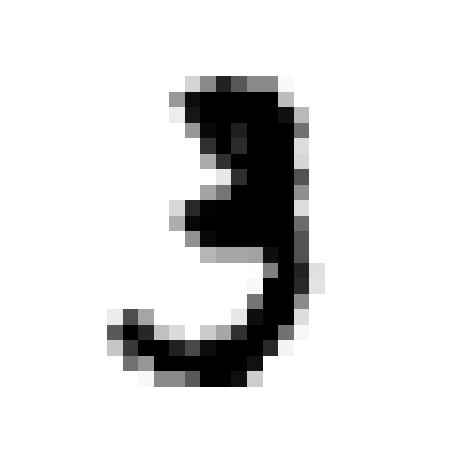

In [39]:
plt.imshow(x_train[10, :], cmap=plt.cm.binary)
plt.axis(False)
plt.show()

In [44]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4873 - accuracy: 0.8593
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1517 - accuracy: 0.9553
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1032 - accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0882 - accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0717 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0587 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0482 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0430 - accuracy: 0.9859: 0s
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0

In [49]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0740 - accuracy: 0.9801


[0.0739634707570076, 0.9800999760627747]

###### 기본이미지 분류

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.4.0-dev20200724


In [52]:
# 패션 MNIST 데이터셋 임포트하기
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [68]:
# 데이터 탐색
train_images.shape, len(train_labels), test_images.shape, len(test_labels)

((60000, 28, 28), 60000, (10000, 28, 28), 10000)

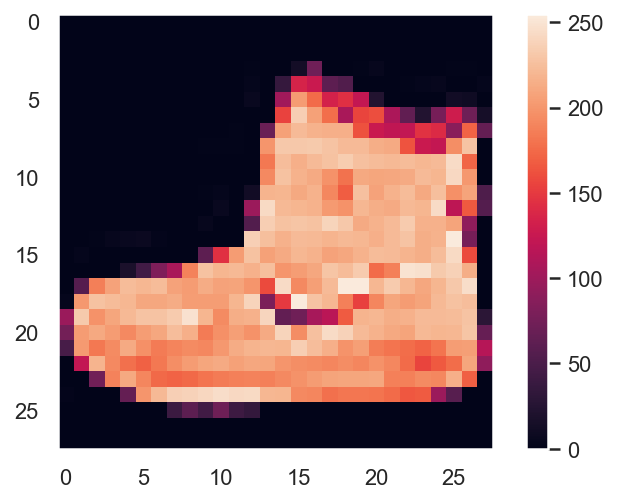

In [65]:
# 데이터 전처리
plt.imshow(train_images[0, :])
plt.colorbar()
plt.grid(False)
plt.show()

    레이블	클래스
    0	T-shirt/top
    1	Trouser
    2	Pullover
    3	Dress
    4	Coat
    5	Sandal
    6	Shirt
    7	Sneaker
    8	Bag
    9	Ankle boot

In [63]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [70]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 
# 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [90]:
class_names[train_labels[24]]

'Coat'

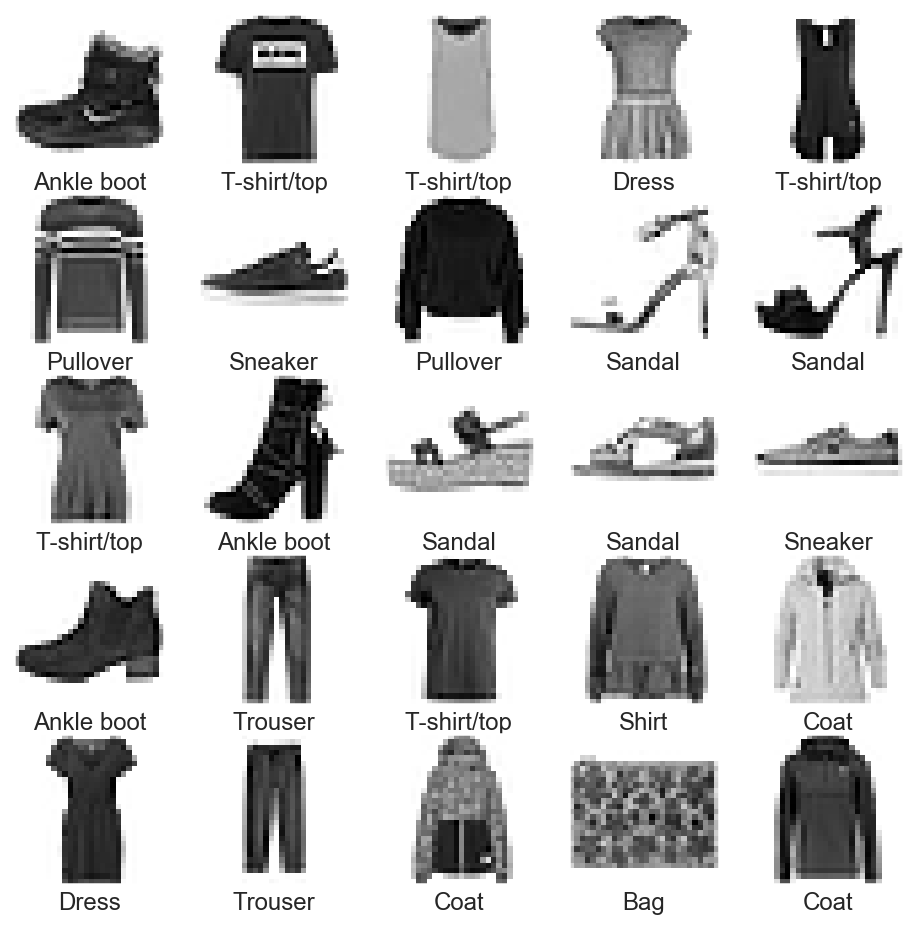

In [81]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [182]:
# 모델 구성
# 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), # 층 설정
    keras.layers.Dense(80, activation='elu'),
    keras.layers.Dense(40, activation='swish'),
    keras.layers.Dense(10, activation='softmax')
])

In [183]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [184]:
# 모델 훈련
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1250 - accuracy: 0.5690
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5514 - accuracy: 0.7977
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4708 - accuracy: 0.8324
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4446 - accuracy: 0.8372
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4112 - accuracy: 0.8487: 0s - loss: 0.4
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3915 - accuracy: 0.8576
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3713 - accuracy: 0.8650
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8700
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3481 - accuracy: 0.8733
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/st

In [185]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3754 - accuracy: 0.8671

테스트 정확도: 0.8671000003814697


In [186]:
predictions = model.predict(test_images)

In [187]:
predictions[1]

array([1.6661087e-04, 2.2141810e-05, 9.9460298e-01, 1.3492610e-06,
       2.0949317e-03, 1.4499835e-09, 3.1104013e-03, 1.3808341e-13,
       1.5744835e-06, 1.9101424e-12], dtype=float32)

In [188]:
np.argmax(predictions[1])

2

In [189]:
test_labels[1]

2

In [190]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

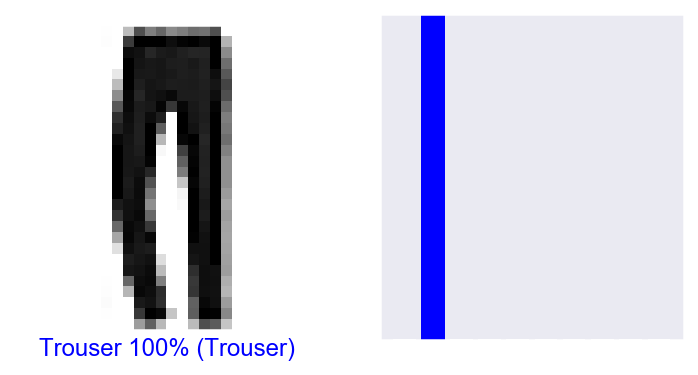

In [191]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

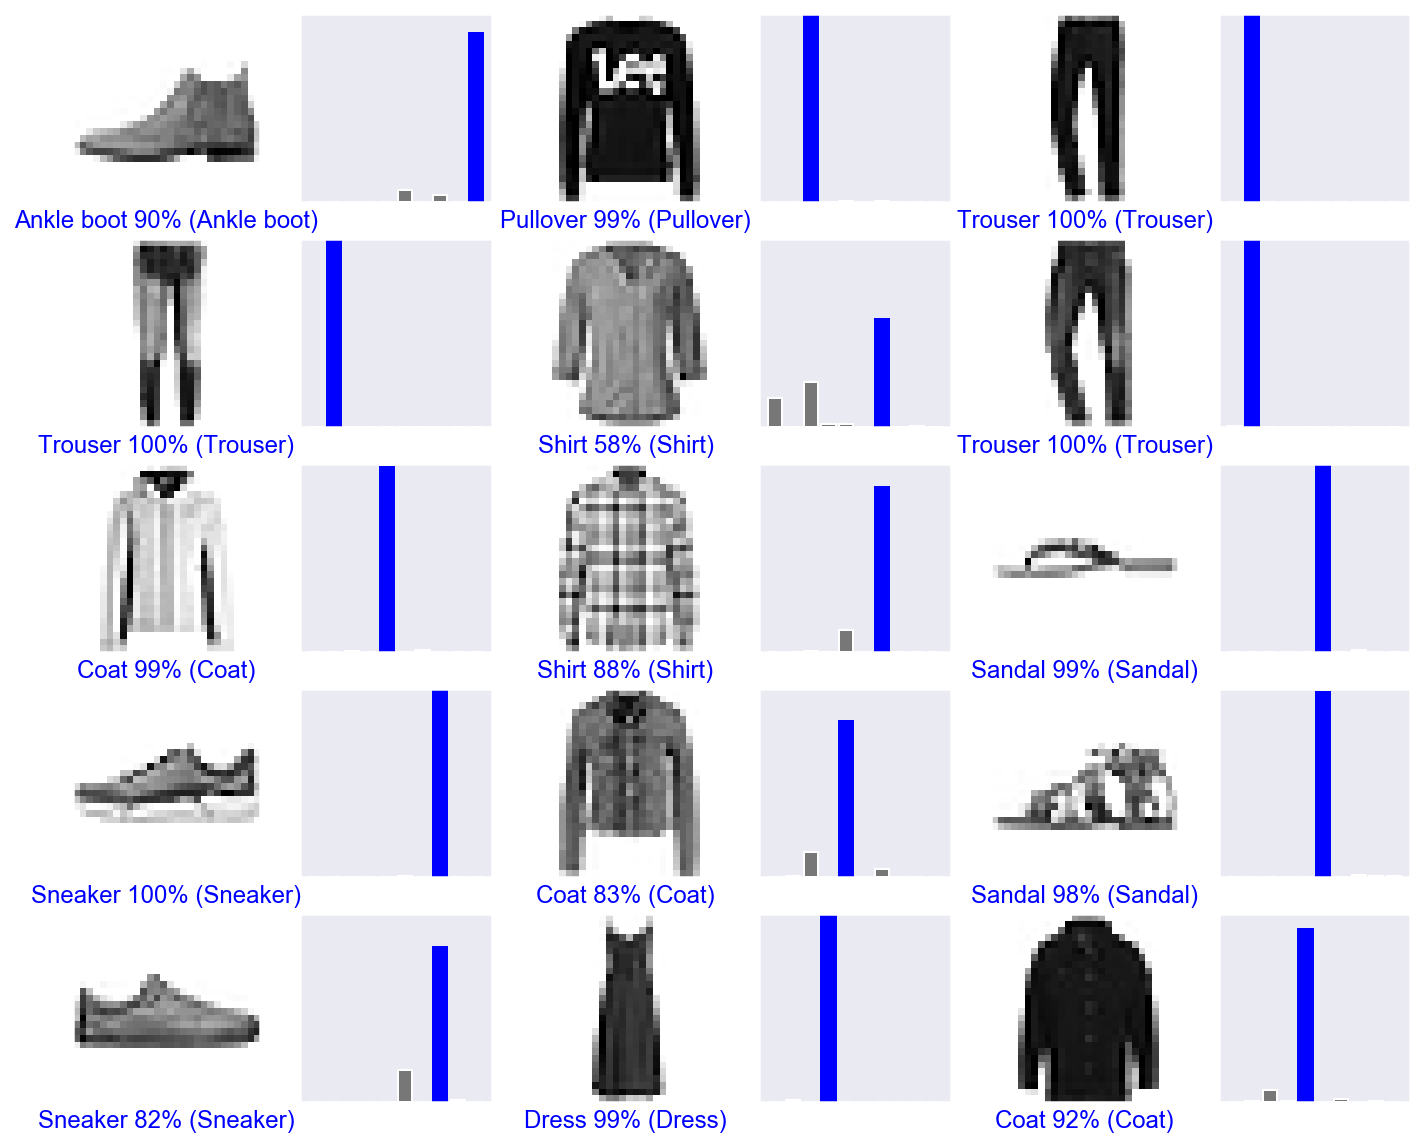

In [192]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [193]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[2]

print(img.shape)

(28, 28)


In [194]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [195]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.6703661e-05 9.9997175e-01 3.2569400e-08 1.0541829e-06 1.8822384e-08
  8.9974312e-09 2.6369307e-07 7.4304087e-12 3.0108733e-08 5.8066107e-08]]


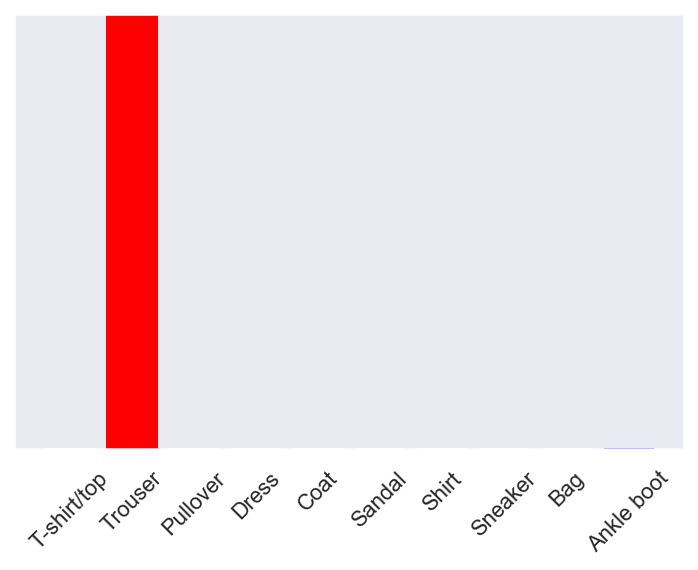

In [196]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [198]:
np.argmax(predictions_single[0])

1